In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#可视化库Seabon,提供了一个绘制统计图形的高级接口
import seaborn as sns

#回归
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

#KNN
from sklearn.neighbors import KNeighborsRegressor

#决策树
#集成学习主要有2种：基于Boosting的和基于Bagging，前者的代表算法有Adaboost、GBDT、XGBOOST、后者的代表算法主要是随机森林
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor

from xgboost import XGBRegressor

from lightgbm import LGBMRegressor

# 支持向量机
from sklearn.svm import SVR

#评价标准
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#数据归一化 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

# 数据导入

In [3]:
train = pd.read_csv('./zhengqi_train.txt',sep = '\t')
test = pd.read_csv('./zhengqi_test.txt',sep = '\t')

In [4]:
train

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384
5,0.445,0.627,0.408,0.220,0.458,-1.056,-1.009,-1.896,0.481,-2.114,...,0.454,0.674,0.358,0.618,-0.843,-0.290,0.364,-0.191,-0.883,0.060
6,0.889,0.416,0.640,0.356,0.224,-0.893,-0.812,-1.823,0.729,-2.114,...,0.454,0.081,0.243,0.468,-0.843,-0.290,0.364,-0.155,-1.318,0.415
7,0.984,0.529,0.704,0.438,0.258,-0.917,-0.682,-1.721,0.753,-2.114,...,0.139,-0.050,0.428,-0.119,-0.843,-0.290,0.364,0.100,-0.899,0.609
8,0.948,0.850,0.584,0.459,0.591,-0.523,-0.591,-1.524,0.763,-2.114,...,0.188,0.467,0.597,-0.057,-0.843,-0.290,0.364,0.053,-0.553,0.981
9,1.157,1.055,0.638,0.617,1.483,-0.731,-0.612,-1.524,0.968,-2.114,...,0.860,0.456,0.916,0.039,-0.843,-0.290,0.364,0.151,-1.157,0.818


# 数据聚合

In [11]:
#concat(), append()默认用来纵向连接DataFrame对象， merge()用来横向连接DataFrame对象。
train['origin'] = 'train'
test['origin'] = 'test'

data_all = pd.concat([train,test],ignore_index=True)
print(data_all.shape)

(4813, 40)


In [12]:
data_all.head()

,V0,V1,V10,V11,V12,V13,V14,V15,V16,V17,...,V36,V37,V4,V5,V6,V7,V8,V9,origin,target
0,0.566,0.016,-0.940,-0.307,-0.073,0.550,-0.484,0.000,-1.707,-1.162,...,-2.608,-3.508,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,train,0.175
1,0.968,0.437,0.188,-0.455,-0.134,1.109,-0.488,0.000,-0.977,-1.162,...,-0.335,-0.730,0.194,-0.893,-1.566,-2.360,0.332,-2.114,train,0.676
2,1.013,0.568,0.874,-0.051,-0.072,0.767,-0.493,-0.212,-0.618,-0.897,...,0.765,-0.589,0.112,-0.797,-1.367,-2.360,0.396,-2.114,train,0.633
3,0.733,0.368,0.011,0.102,-0.014,0.769,-0.371,-0.162,-0.429,-0.897,...,0.333,-0.112,0.599,-0.679,-1.200,-2.086,0.403,-2.114,train,0.206
4,0.684,0.638,-0.251,0.570,0.199,-0.349,-0.342,-0.138,-0.391,-0.897,...,-0.280,-0.028,0.337,-0.454,-1.073,-2.086,0.314,-2.114,train,0.384


In [13]:
data_all.tail()

,V0,V1,V10,V11,V12,V13,V14,V15,V16,V17,...,V36,V37,V4,V5,V6,V7,V8,V9,origin,target
4808,-1.362,-1.553,-2.551,0.518,0.396,0.928,1.452,0.867,-5.143,1.227,...,-2.564,0.597,0.381,1.375,-4.854,-5.331,-4.074,-3.838,test,NaN
4809,-2.698,-3.452,-2.525,0.311,-1.786,1.871,1.885,1.135,-5.774,1.227,...,-2.564,1.215,-1.385,1.378,-4.927,-5.103,-4.393,-1.683,test,NaN
4810,-2.615,-3.564,-2.529,-0.029,-1.151,1.976,2.337,0.504,-4.752,1.492,...,-2.544,1.612,-1.272,1.121,-4.223,-4.315,-5.196,-3.407,test,NaN
4811,-2.661,-3.646,-2.560,-0.028,-1.512,1.520,2.243,0.206,-4.200,1.492,...,-2.549,1.431,-1.270,1.116,-3.716,-3.809,-4.735,-2.976,test,NaN
4812,-2.321,-3.037,0.056,0.306,-1.154,0.847,2.221,0.206,-3.960,1.492,...,-1.123,1.988,-0.910,1.259,-3.616,-3.747,-4.368,-2.976,test,NaN


# 特征探索

In [15]:
data_all.columns[:-2]

Index(['V0', 'V1', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V2', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'V29', 'V3', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35',
       'V36', 'V37', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9'],
      dtype='object')

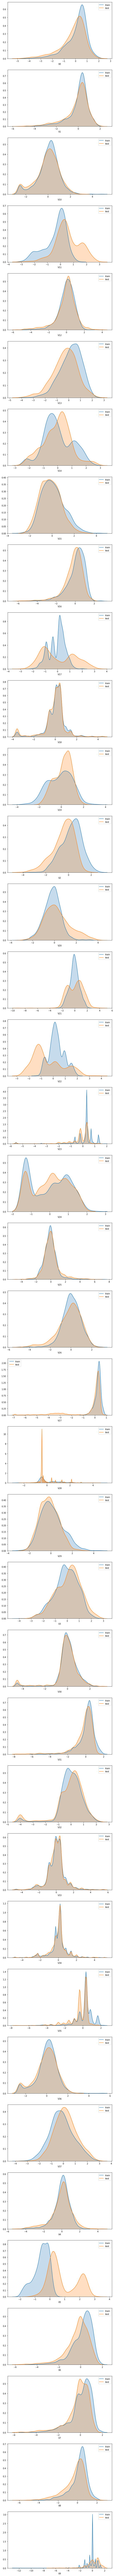

In [16]:
# 38个特征，将一些不重要的特征删除
# 特征分布情况，训练和测试数据特征分布不均匀，删除
plt.figure(figsize=(9,38*6))
for i,col in enumerate(data_all.columns[:-2]):
    cond = data_all['origin'] == 'train'
    train_col = data_all[col][cond] #训练数据
    cond = data_all['origin'] == 'test'
    test_col = data_all[col][cond] #测试数据
    axes = plt.subplot(38,1,i+1)
    ax = sns.kdeplot(train_col,shade = True)
    sns.kdeplot(test_col,shade = True,ax = ax)
    plt.legend(['train','test'])
    plt.xlabel(col)

<Figure size 648x432 with 0 Axes>

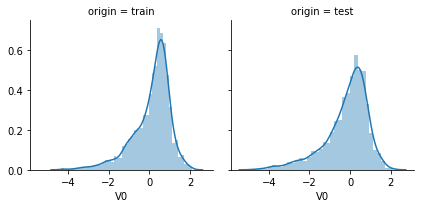

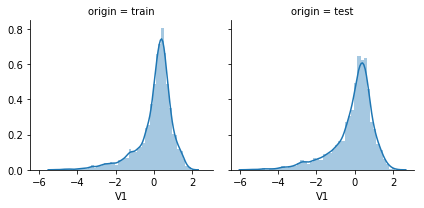

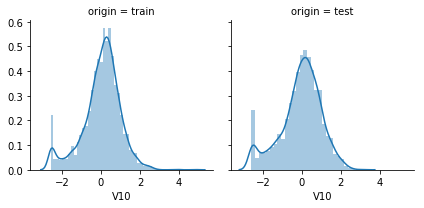

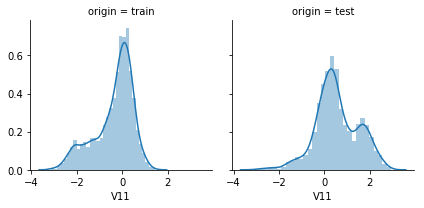

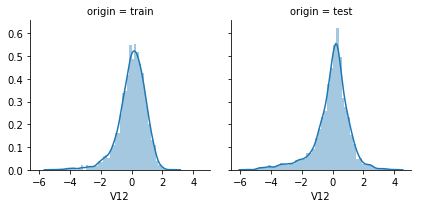

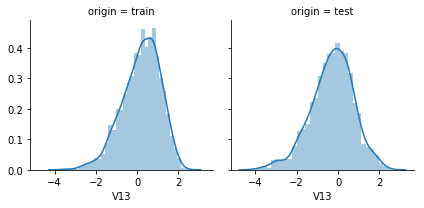

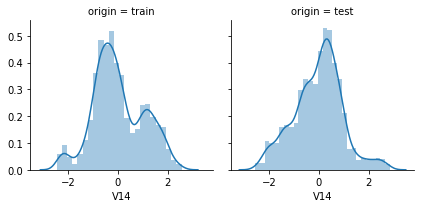

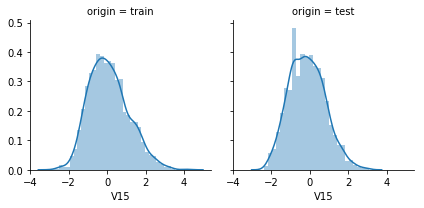

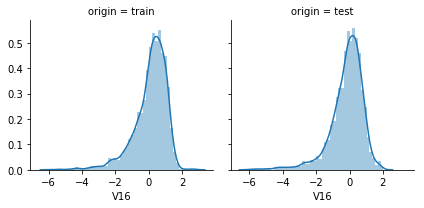

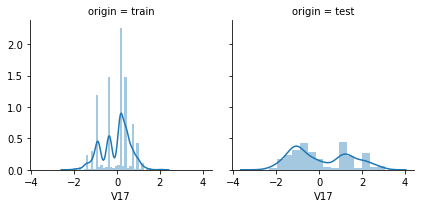

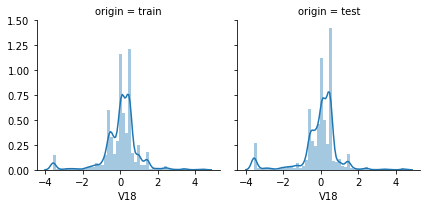

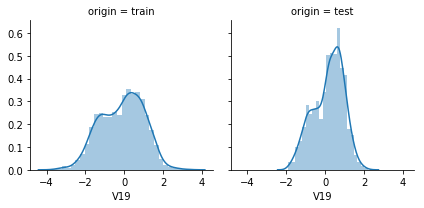

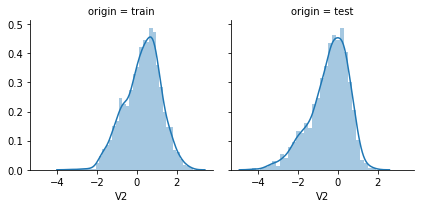

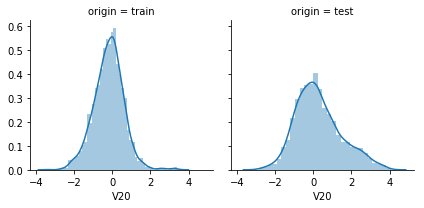

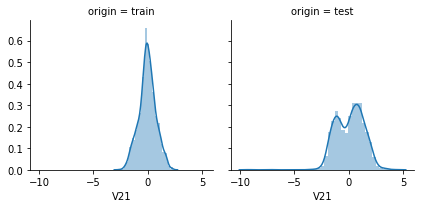

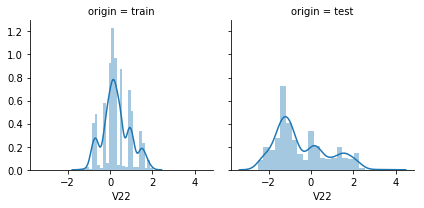

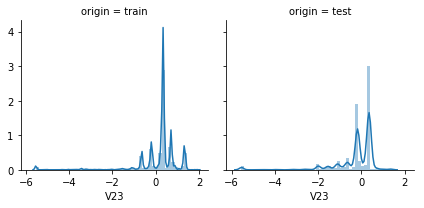

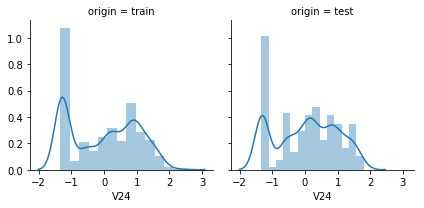

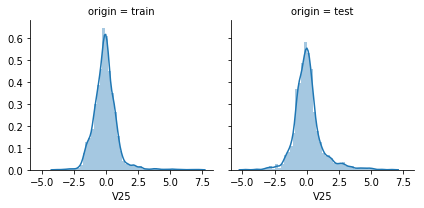

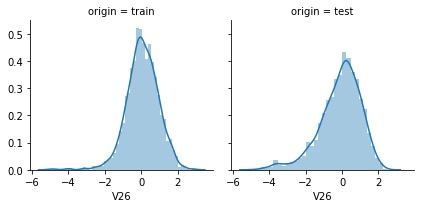

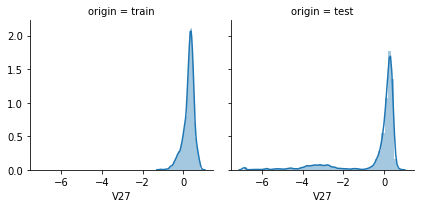

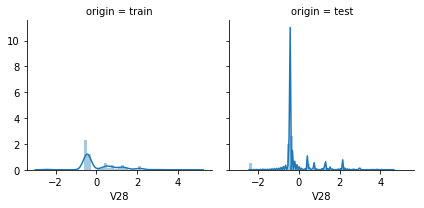

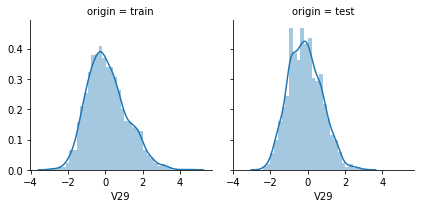

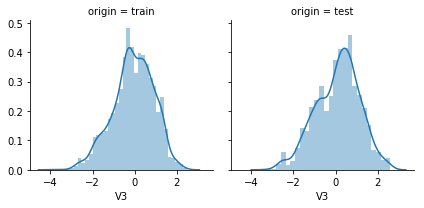

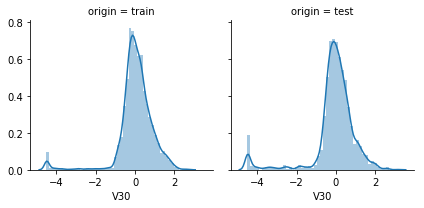

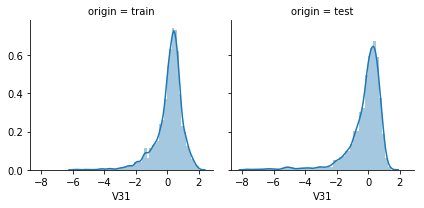

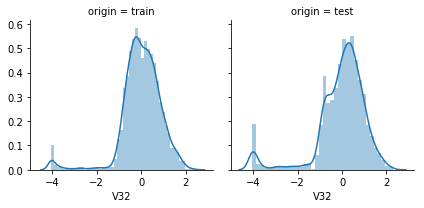

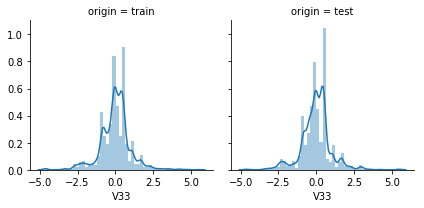

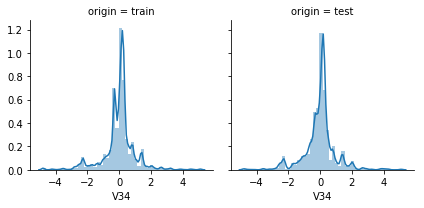

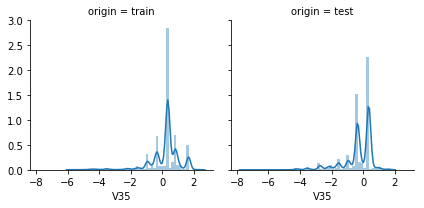

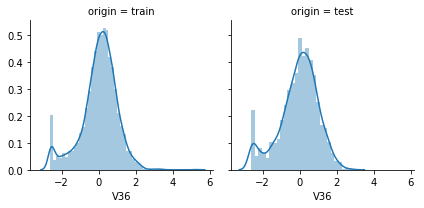

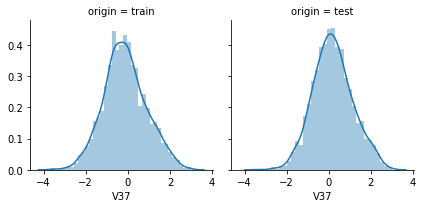

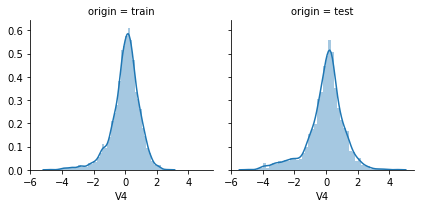

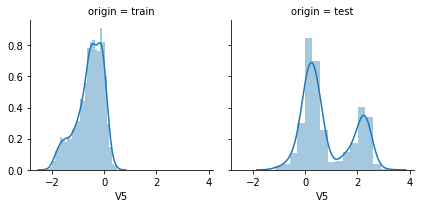

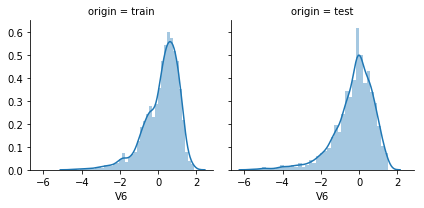

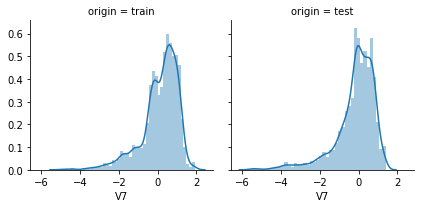

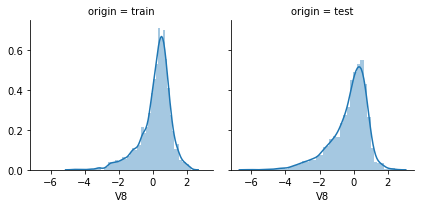

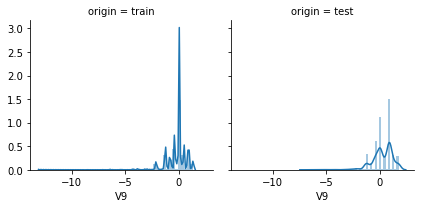

In [17]:
plt.figure(figsize=(9,6))
for col in data_all.columns[:-2]:
    g = sns.FacetGrid(data_all,col = 'origin')
    g.map(sns.distplot,col)#distribute 分配；散布；分开

In [18]:
drop_labels = ['V11','V17','V22','V5']
data_all.drop(drop_labels,axis = 1,inplace=True)
data_all.shape

(4813, 36)

# 相关系数corr

In [19]:
#协方差
cov = data_all.cov()
cov

,V0,V1,V10,V12,V13,V14,V15,V16,V18,V19,...,V34,V35,V36,V37,V4,V6,V7,V8,V9,target
V0,1.000025,0.903982,0.321419,0.724819,0.227613,0.047217,0.351832,0.304059,0.148834,-0.121430,...,-0.026891,0.162476,0.254698,-0.498201,0.784839,0.180416,0.151922,0.767856,0.053450,0.797374
V1,0.903982,1.000031,0.333186,0.615086,0.189003,0.026079,0.177391,0.404681,0.132534,-0.106672,...,-0.028009,0.167848,0.258554,-0.515544,0.656987,0.262892,0.213077,0.856050,0.127983,0.807694
V10,0.321419,0.333186,1.000034,0.141233,-0.044205,-0.066704,-0.034576,0.557380,0.006353,0.090936,...,-0.008258,0.105840,0.927944,-0.045381,0.152349,0.441228,0.360234,0.408018,0.116110,0.376113
V12,0.724819,0.615086,0.141233,1.000027,0.128977,0.101724,0.625062,-0.053284,0.061986,-0.192903,...,-0.054250,0.037329,0.119072,-0.042680,0.928831,-0.131589,-0.036766,0.306602,-0.012849,0.522741
V13,0.227613,0.189003,-0.044205,0.128977,1.000004,0.558107,0.053454,0.122070,0.257730,-0.171647,...,0.041974,0.134536,-0.013154,-0.401541,0.134826,0.135847,0.096140,0.193717,-0.190371,0.184655
V14,0.047217,0.026079,-0.066704,0.101724,0.558107,1.000004,0.104101,-0.021770,0.060203,-0.029094,...,-0.026141,0.102174,-0.072027,0.011540,0.115968,-0.017943,0.066557,-0.012774,-0.038728,0.008418
V15,0.351832,0.177391,-0.034576,0.625062,0.053454,0.104101,0.999996,-0.312726,0.025783,-0.214456,...,-0.009428,0.059906,-0.039433,0.190983,0.593238,-0.383296,-0.247751,0.000270,-0.191708,0.156559
V16,0.304059,0.404681,0.557380,-0.053284,0.122070,-0.021770,-0.312726,1.000001,0.089612,0.030553,...,0.001209,0.166700,0.556851,-0.400590,-0.016419,0.846768,0.759681,0.661085,0.140382,0.519231
V18,0.148834,0.132534,0.006353,0.061986,0.257730,0.060203,0.025783,0.089612,1.000010,0.022182,...,0.343436,0.151137,0.043935,-0.213517,0.079489,0.146038,0.103412,0.136269,0.233367,0.160166
V19,-0.121430,-0.106672,0.090936,-0.192903,-0.171647,-0.029094,-0.214456,0.030553,0.022182,1.000167,...,-0.003022,-0.126083,0.097326,0.026845,-0.244627,0.238608,0.185481,-0.106168,0.299938,-0.125448


In [20]:
#相关性系数
corr = data_all.corr()
corr.head()

,V0,V1,V10,V12,V13,V14,V15,V16,V18,V19,...,V34,V35,V36,V37,V4,V6,V7,V8,V9,target
V0,1.000000,0.903956,0.321410,0.724800,0.227610,0.047217,0.351828,0.304055,0.148831,-0.121418,...,-0.026891,0.162464,0.254690,-0.498186,0.784818,0.180407,0.151916,0.767851,0.053435,0.873212
V1,0.903956,1.000000,0.333175,0.615068,0.188999,0.026078,0.177389,0.404674,0.132532,-0.106661,...,-0.028008,0.167835,0.258545,-0.515528,0.656967,0.262878,0.213067,0.856041,0.127948,0.871846
V10,0.321410,0.333175,1.000000,0.141228,-0.044204,-0.066702,-0.034576,0.557371,0.006353,0.090927,...,-0.008258,0.105831,0.927911,-0.045380,0.152344,0.441205,0.360217,0.408014,0.116079,0.394767
V12,0.724800,0.615068,0.141228,1.000000,0.128975,0.101722,0.625054,-0.053284,0.061985,-0.192885,...,-0.054250,0.037326,0.119068,-0.042679,0.928805,-0.131583,-0.036765,0.306600,-0.012846,0.594189
V13,0.227610,0.188999,-0.044204,0.128975,1.000000,0.558105,0.053453,0.122069,0.257728,-0.171632,...,0.041974,0.134527,-0.013154,-0.401534,0.134824,0.135842,0.096137,0.193717,-0.190322,0.203373


In [21]:
# 协方差是两个属性之间的关系，如果两个属性一样：方差
# 方差是协方差的一种特殊形式
# 圆是椭圆一种特殊形式
# 导数是偏导数的特殊形式
0.861242/(0.861242**0.5*0.861242**0.5)

1.0000000000000002

In [24]:
corr.loc['target'].abs() < 0.1

V0        False
V1        False
V10       False
V12       False
V13       False
V14        True
V15       False
V16       False
V18       False
V19       False
V2        False
V20       False
V21        True
V23       False
V24       False
V25        True
V26        True
V27       False
V28       False
V29       False
V3        False
V30       False
V31       False
V32        True
V33        True
V34        True
V35       False
V36       False
V37       False
V4        False
V6        False
V7        False
V8        False
V9        False
target    False
Name: target, dtype: bool

In [25]:
# 通过相关性系数找到7个相关性不大的属性
cond = corr.loc['target'].abs() < 0.1
drop_labels = corr.loc['target'].index[cond]
# Index(['V14', 'V21', 'V25', 'V26', 'V32', 'V33', 'V34'], dtype='object')
drop_labels

# 查看了属性的分布，分布不好的删除
drop_labels = ['V14', 'V21']
data_all.drop(drop_labels,axis = 1,inplace=True)

In [26]:
data_all.shape

(4813, 34)

In [ ]:
np.triu_indices_from(mask)

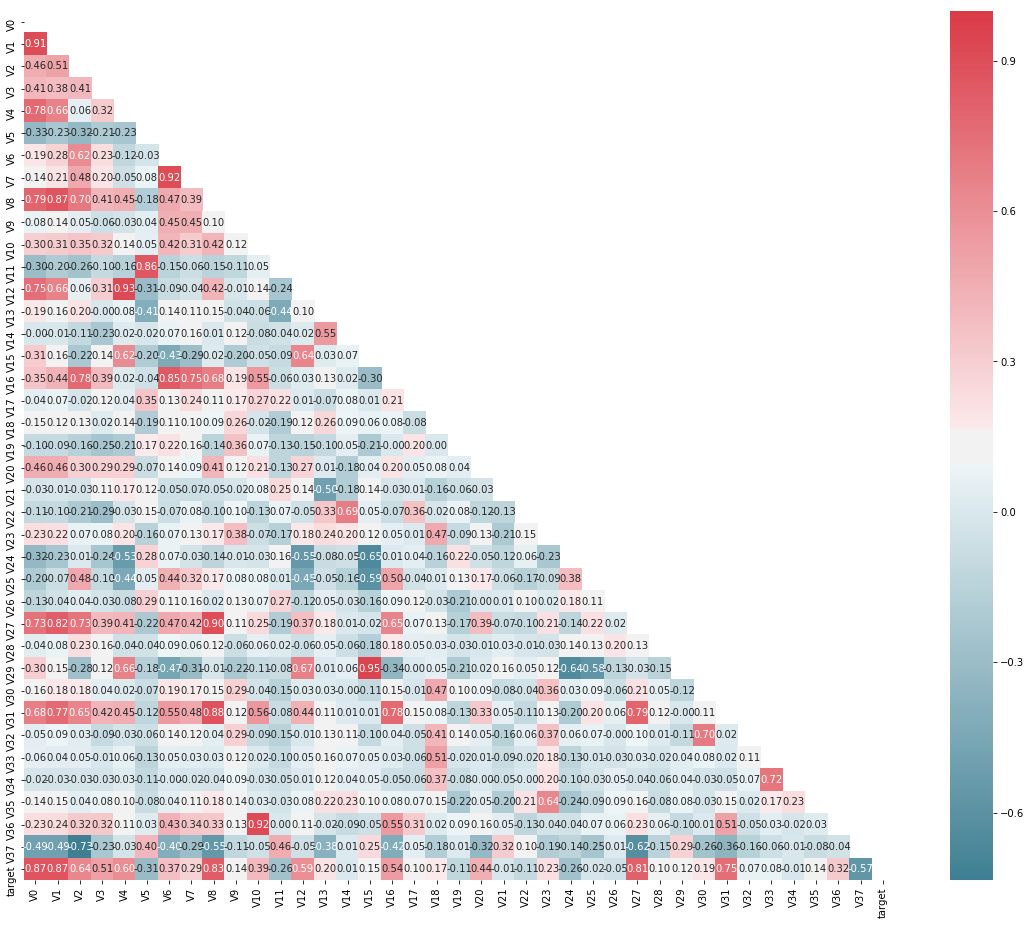

In [27]:
# 找出相关程度
plt.figure(figsize=(20, 16))  # 指定绘图对象宽度和高度
mcorr = train.corr()  # 相关系数矩阵，即给出了任意两个变量之间的相关系数
mask = np.zeros_like(mcorr, dtype=np.bool)  # 构造与mcorr同维数矩阵 为bool型

mask[np.triu_indices_from(mask)] = True  # 角分线右侧为True
# 颜色
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 返回matplotlib colormap对象
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  # 热力图（看两两相似度）
plt.show()

# 标准化操作

In [28]:
#标准差
data_all.std()

V0        1.000013
V1        1.000016
V10       1.000017
V12       1.000014
V13       1.000002
V15       0.999998
V16       1.000000
V18       1.000005
V19       1.000084
V2        1.000007
V20       0.999991
V23       1.000003
V24       1.000184
V25       1.000038
V26       1.000037
V27       0.999999
V28       1.000031
V29       0.999997
V3        0.999995
V30       0.999993
V31       0.999999
V32       1.000077
V33       1.000068
V34       0.999998
V35       1.000062
V36       1.000019
V37       1.000017
V4        1.000015
V6        1.000035
V7        1.000030
V8        0.999994
V9        1.000257
target    0.983966
dtype: float64

In [52]:
data_all.tail()

,V0,V1,V10,V12,V13,V15,V16,V18,V19,V2,...,V35,V36,V37,V4,V6,V7,V8,V9,origin,target
4808,-1.362,-1.553,-2.551,0.396,0.928,0.867,-5.143,-3.573,0.107,-3.096,...,-2.131,-2.564,0.597,0.381,-4.854,-5.331,-4.074,-3.838,test,NaN
4809,-2.698,-3.452,-2.525,-1.786,1.871,1.135,-5.774,-0.965,0.193,-3.620,...,-2.131,-2.564,1.215,-1.385,-4.927,-5.103,-4.393,-1.683,test,NaN
4810,-2.615,-3.564,-2.529,-1.151,1.976,0.504,-4.752,-1.568,0.301,-3.402,...,-1.537,-2.544,1.612,-1.272,-4.223,-4.315,-5.196,-3.407,test,NaN
4811,-2.661,-3.646,-2.560,-1.512,1.520,0.206,-4.200,-1.282,-0.036,-3.271,...,-1.537,-2.549,1.431,-1.270,-3.716,-3.809,-4.735,-2.976,test,NaN
4812,-2.321,-3.037,0.056,-1.154,0.847,0.206,-3.960,-1.213,0.592,-3.214,...,-1.537,-1.123,1.988,-0.910,-3.616,-3.747,-4.368,-2.976,test,NaN


In [53]:
data_all[data_all['origin'] == 'test'].describe()

,V0,V1,V10,V12,V13,V15,V16,V18,V19,V2,...,V34,V35,V36,V37,V4,V6,V7,V8,V9,target
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,0.0
mean,-0.184404,-0.083912,-0.051709,-0.034592,-0.293726,-0.144125,-0.170339,-0.082423,0.172829,-0.434762,...,-0.009985,-0.296895,-0.046270,0.195735,-0.019172,-0.274092,-0.173971,-0.266709,0.255114,NaN
std,1.073333,1.076670,1.043967,1.139994,1.039017,0.930072,1.001178,1.060944,0.778954,0.969541,...,0.995213,0.946896,1.040854,0.940599,1.147286,1.054119,1.040101,1.085916,1.014394,NaN
min,-4.814000,-5.488000,-2.583000,-5.505000,-4.087000,-2.376000,-6.060000,-3.583000,-1.904000,-4.283000,...,-4.789000,-7.477000,-2.608000,-3.346000,-4.921000,-5.649000,-5.625000,-6.059000,-6.784000,NaN
25%,-0.664000,-0.451000,-0.568000,-0.473000,-0.923000,-0.839000,-0.597000,-0.384000,-0.412000,-0.978000,...,-0.290000,-0.349000,-0.593000,-0.432000,-0.497000,-0.732000,-0.509000,-0.775000,-0.390000,NaN
50%,0.065000,0.195000,0.079000,0.132000,-0.204000,-0.198000,-0.005000,0.075000,0.291000,-0.267000,...,0.160000,-0.270000,0.083000,0.152000,0.118000,-0.082000,0.018000,-0.004000,0.401000,NaN
75%,0.549000,0.589000,0.634000,0.583000,0.412000,0.493000,0.464000,0.438000,0.746000,0.278000,...,0.273000,0.364000,0.651000,0.797000,0.610000,0.457000,0.515000,0.482000,0.904000,NaN
max,2.100000,2.120000,3.118000,4.011000,2.587000,3.073000,2.033000,4.440000,2.196000,1.946000,...,5.110000,1.671000,2.861000,3.021000,4.475000,1.528000,1.394000,2.408000,1.766000,NaN


In [34]:
data_all[data_all['origin'] == 'train'].describe()

,V0,V1,V10,V12,V13,V15,V16,V18,V19,V2,...,V34,V35,V36,V37,V4,V6,V7,V8,V9,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.034319,0.023177,0.195738,0.096146,0.113505,0.055034,-0.114884,0.289720,...,0.006715,0.197764,0.030658,-0.130330,0.012921,0.182892,0.116155,0.177856,-0.169452,0.126353
std,0.928031,0.941515,0.968272,0.894092,0.922757,1.033048,0.983128,0.953466,1.108859,0.911236,...,1.003291,0.985675,0.970812,1.017196,0.888377,0.918054,0.955116,0.895444,0.953813,0.983966
min,-4.335000,-5.122000,-2.584000,-5.165000,-3.675000,-2.903000,-5.981000,-3.582000,-3.704000,-3.420000,...,-4.789000,-5.695000,-2.608000,-3.630000,-4.742000,-4.576000,-5.048000,-4.692000,-12.891000,-3.044000
25%,-0.297000,-0.226250,-0.420500,-0.419000,-0.398000,-0.662250,-0.300000,-0.367500,-0.987500,-0.313000,...,-0.290000,-0.202500,-0.413000,-0.798250,-0.385000,-0.310000,-0.295000,-0.159000,-0.390000,-0.350250
50%,0.359000,0.272500,0.157000,0.123000,0.289500,-0.000500,0.306000,0.082000,-0.000500,0.386000,...,0.160000,0.364000,0.137000,-0.185500,0.110000,0.388000,0.344000,0.362000,0.042000,0.313000
75%,0.726000,0.599000,0.619250,0.616000,0.864250,0.730000,0.774250,0.513250,0.737250,0.918250,...,0.273000,0.602000,0.644250,0.495250,0.550250,0.831250,0.782250,0.726000,0.042000,0.793250
max,2.121000,1.918000,4.830000,2.657000,2.475000,4.314000,2.861000,4.441000,3.431000,2.828000,...,5.110000,2.324000,5.238000,3.000000,2.689000,1.895000,1.918000,2.245000,1.335000,2.538000


In [55]:
stand = StandardScaler()
data = data_all.iloc[:,:-2]
data2 = stand.fit_transform(data)
data2

array([[ 0.56597193,  0.01591954, -0.9399929 , ..., -2.36029151,
        -0.43609637, -2.11403393],
       [ 0.96800866,  0.43695666,  0.18810505, ..., -2.36029151,
         0.33198774, -2.11403393],
       [ 1.01301277,  0.56796822,  0.87416462, ..., -2.36029151,
         0.39599475, -2.11403393],
       ...,
       [-2.61531873, -3.56439613, -2.52913089, ..., -4.31543659,
        -5.1966177 , -3.40683652],
       [-2.66132294, -3.64640336, -2.56013358, ..., -3.80939904,
        -4.73556721, -2.97590232],
       [-2.32129187, -3.03734966,  0.05609359, ..., -3.74739444,
        -4.36852701, -2.97590232]])

In [69]:
cols = data_all.columns
data_all_std = pd.DataFrame(data2,columns=cols[:-2])
data_all_std

,V0,V1,V10,V12,V13,V15,V16,V18,V19,V2,...,V33,V34,V35,V36,V37,V4,V6,V7,V8,V9
0,0.565972,0.015920,-0.939993,-0.073078,0.550083,-0.000048,-1.707156,-0.573113,-0.991209,-0.142971,...,-4.627276,-4.789544,-5.101136,-2.608111,-3.508388,0.451955,-1.812243,-2.360292,-0.436096,-2.114034
1,0.968009,0.436957,0.188105,-0.134084,1.109140,-0.000048,-0.977080,-0.571113,-0.836206,0.066049,...,-0.843138,0.159981,0.364095,-0.334919,-0.730146,0.193932,-1.566226,-2.360292,0.331988,-2.114034
2,1.013013,0.567968,0.874165,-0.072078,0.767105,-0.212070,-0.618043,-0.564112,-0.558201,0.235065,...,-0.843138,0.159981,0.364095,0.765175,-0.589134,0.111925,-1.367212,-2.360292,0.395995,-2.114034
3,0.732987,0.367951,0.011090,-0.014073,0.769105,-0.162065,-0.429023,-0.574113,-0.564201,0.283070,...,-0.843138,-0.065042,0.364095,0.333138,-0.112092,0.598968,-1.200201,-2.086271,0.402996,-2.114034
4,0.683983,0.637974,-0.250933,0.198947,-0.349009,-0.138063,-0.391019,-0.572113,-0.394197,0.260068,...,-0.843138,-0.215058,0.364095,-0.279914,-0.028085,0.336945,-1.073192,-2.086271,0.313986,-2.114034
5,0.444961,0.626973,-0.510956,0.293955,0.912120,0.110964,-0.333013,-0.573113,-0.516200,0.408082,...,-0.843138,-0.290066,0.364095,-0.190906,-0.883160,0.457956,-1.009187,-1.896257,0.481004,-2.114034
6,0.889001,0.415955,-0.255934,0.424967,0.632091,0.110964,-0.333013,-0.586115,-0.544200,0.640104,...,-0.843138,-0.290066,0.364095,-0.154903,-1.318198,0.223935,-0.812174,-1.823252,0.729031,-2.114034
7,0.984010,0.528965,-0.066917,0.271953,0.780107,0.243978,0.065028,-0.579114,-0.465199,0.704111,...,-0.843138,-0.290066,0.364095,0.100118,-0.899161,0.257938,-0.682165,-1.721244,0.753034,-2.114034
8,0.948007,0.849993,0.205107,0.386963,-0.288002,0.292983,0.166038,-0.566113,-0.173193,0.584099,...,-0.843138,-0.290066,0.364095,0.053114,-0.553131,0.590968,-0.591158,-1.524229,0.763035,-2.114034
9,1.157026,1.055011,0.145101,0.687991,-0.139987,0.316985,0.195041,-0.567113,-0.557201,0.638104,...,-0.843138,-0.290066,0.364095,0.151123,-1.157184,1.483047,-0.612160,-1.524229,0.968057,-2.114034


In [70]:
data_all.index = np.arange(4813)
data_all

,V0,V1,V10,V12,V13,V15,V16,V18,V19,V2,...,V35,V36,V37,V4,V6,V7,V8,V9,origin,target
0,0.566,0.016,-0.940,-0.073,0.550,0.000,-1.707,-0.573,-0.991,-0.143,...,-5.101,-2.608,-3.508,0.452,-1.812,-2.360,-0.436,-2.114,train,0.175
1,0.968,0.437,0.188,-0.134,1.109,0.000,-0.977,-0.571,-0.836,0.066,...,0.364,-0.335,-0.730,0.194,-1.566,-2.360,0.332,-2.114,train,0.676
2,1.013,0.568,0.874,-0.072,0.767,-0.212,-0.618,-0.564,-0.558,0.235,...,0.364,0.765,-0.589,0.112,-1.367,-2.360,0.396,-2.114,train,0.633
3,0.733,0.368,0.011,-0.014,0.769,-0.162,-0.429,-0.574,-0.564,0.283,...,0.364,0.333,-0.112,0.599,-1.200,-2.086,0.403,-2.114,train,0.206
4,0.684,0.638,-0.251,0.199,-0.349,-0.138,-0.391,-0.572,-0.394,0.260,...,0.364,-0.280,-0.028,0.337,-1.073,-2.086,0.314,-2.114,train,0.384
5,0.445,0.627,-0.511,0.294,0.912,0.111,-0.333,-0.573,-0.516,0.408,...,0.364,-0.191,-0.883,0.458,-1.009,-1.896,0.481,-2.114,train,0.060
6,0.889,0.416,-0.256,0.425,0.632,0.111,-0.333,-0.586,-0.544,0.640,...,0.364,-0.155,-1.318,0.224,-0.812,-1.823,0.729,-2.114,train,0.415
7,0.984,0.529,-0.067,0.272,0.780,0.244,0.065,-0.579,-0.465,0.704,...,0.364,0.100,-0.899,0.258,-0.682,-1.721,0.753,-2.114,train,0.609
8,0.948,0.850,0.205,0.387,-0.288,0.293,0.166,-0.566,-0.173,0.584,...,0.364,0.053,-0.553,0.591,-0.591,-1.524,0.763,-2.114,train,0.981
9,1.157,1.055,0.145,0.688,-0.140,0.317,0.195,-0.567,-0.557,0.638,...,0.364,0.151,-1.157,1.483,-0.612,-1.524,0.968,-2.114,train,0.818


In [71]:
data_all_std = pd.merge(data_all_std,data_all.iloc[:,-2:],left_index=True,right_index=True)
data_all_std.tail()

,V0,V1,V10,V12,V13,V15,V16,V18,V19,V2,...,V35,V36,V37,V4,V6,V7,V8,V9,origin,target
4808,-1.362204,-1.553219,-2.551133,0.395964,0.928122,0.867044,-5.143511,-3.573409,0.106813,-3.096257,...,-2.131011,-2.564108,0.596969,0.380949,-4.854453,-5.331512,-4.074495,-3.837771,test,NaN
4809,-2.698326,-3.452386,-2.525131,-1.786233,1.871218,1.135072,-5.774577,-0.965152,0.192815,-3.620307,...,-2.131011,-2.564108,1.215023,-1.385208,-4.927458,-5.103495,-4.393530,-1.683100,test,NaN
4810,-2.615319,-3.564396,-2.529131,-1.151175,1.976228,0.504005,-4.752471,-1.568211,0.300817,-3.402286,...,-1.536986,-2.544106,1.612058,-1.272198,-4.223410,-4.315437,-5.196618,-3.406837,test,NaN
4811,-2.661323,-3.646403,-2.560134,-1.512208,1.520182,0.205974,-4.200414,-1.282183,-0.036190,-3.271274,...,-1.536986,-2.549106,1.431042,-1.270198,-3.716375,-3.809399,-4.735567,-2.975902,test,NaN
4812,-2.321292,-3.037350,0.056094,-1.154176,0.847113,0.205974,-3.960389,-1.213176,0.591823,-3.214268,...,-1.536986,-1.122985,1.988091,-0.910166,-3.616368,-3.747394,-4.368527,-2.975902,test,NaN


In [72]:
data_all_std.tail()

,V0,V1,V10,V12,V13,V15,V16,V18,V19,V2,...,V35,V36,V37,V4,V6,V7,V8,V9,origin,target
4808,-1.362204,-1.553219,-2.551133,0.395964,0.928122,0.867044,-5.143511,-3.573409,0.106813,-3.096257,...,-2.131011,-2.564108,0.596969,0.380949,-4.854453,-5.331512,-4.074495,-3.837771,test,NaN
4809,-2.698326,-3.452386,-2.525131,-1.786233,1.871218,1.135072,-5.774577,-0.965152,0.192815,-3.620307,...,-2.131011,-2.564108,1.215023,-1.385208,-4.927458,-5.103495,-4.393530,-1.683100,test,NaN
4810,-2.615319,-3.564396,-2.529131,-1.151175,1.976228,0.504005,-4.752471,-1.568211,0.300817,-3.402286,...,-1.536986,-2.544106,1.612058,-1.272198,-4.223410,-4.315437,-5.196618,-3.406837,test,NaN
4811,-2.661323,-3.646403,-2.560134,-1.512208,1.520182,0.205974,-4.200414,-1.282183,-0.036190,-3.271274,...,-1.536986,-2.549106,1.431042,-1.270198,-3.716375,-3.809399,-4.735567,-2.975902,test,NaN
4812,-2.321292,-3.037350,0.056094,-1.154176,0.847113,0.205974,-3.960389,-1.213176,0.591823,-3.214268,...,-1.536986,-1.122985,1.988091,-0.910166,-3.616368,-3.747394,-4.368527,-2.975902,test,NaN


# 使用不同算法进行训练

In [73]:
#异常值
from sklearn.linear_model import RidgeCV

In [74]:
data_all_std.tail()

,V0,V1,V10,V12,V13,V15,V16,V18,V19,V2,...,V35,V36,V37,V4,V6,V7,V8,V9,origin,target
4808,-1.362204,-1.553219,-2.551133,0.395964,0.928122,0.867044,-5.143511,-3.573409,0.106813,-3.096257,...,-2.131011,-2.564108,0.596969,0.380949,-4.854453,-5.331512,-4.074495,-3.837771,test,NaN
4809,-2.698326,-3.452386,-2.525131,-1.786233,1.871218,1.135072,-5.774577,-0.965152,0.192815,-3.620307,...,-2.131011,-2.564108,1.215023,-1.385208,-4.927458,-5.103495,-4.393530,-1.683100,test,NaN
4810,-2.615319,-3.564396,-2.529131,-1.151175,1.976228,0.504005,-4.752471,-1.568211,0.300817,-3.402286,...,-1.536986,-2.544106,1.612058,-1.272198,-4.223410,-4.315437,-5.196618,-3.406837,test,NaN
4811,-2.661323,-3.646403,-2.560134,-1.512208,1.520182,0.205974,-4.200414,-1.282183,-0.036190,-3.271274,...,-1.536986,-2.549106,1.431042,-1.270198,-3.716375,-3.809399,-4.735567,-2.975902,test,NaN
4812,-2.321292,-3.037350,0.056094,-1.154176,0.847113,0.205974,-3.960389,-1.213176,0.591823,-3.214268,...,-1.536986,-1.122985,1.988091,-0.910166,-3.616368,-3.747394,-4.368527,-2.975902,test,NaN


In [75]:
ridge = RidgeCV(alphas=[0.0001,0.001,0.01,0.1,0.2,0.5,1,2,3,4,5,10,20,30,50])

cond = data_all_std['origin'] == 'train'

X_train = data_all_std[cond].iloc[:,:-2]
# 真实值
y_train = data_all_std[cond]['target']
# 算法拟合数据和目标值的时候，不可能100%拟合
ridge.fit(X_train,y_train)
# 预测，预测值肯定会和真实值有一定的偏差，偏差特别大，当成异常值
y_ = ridge.predict(X_train)

In [76]:
#寻找异常值
cond = abs((y_train - y_ )) > y_train.std()*0.8
cond.sum()

88

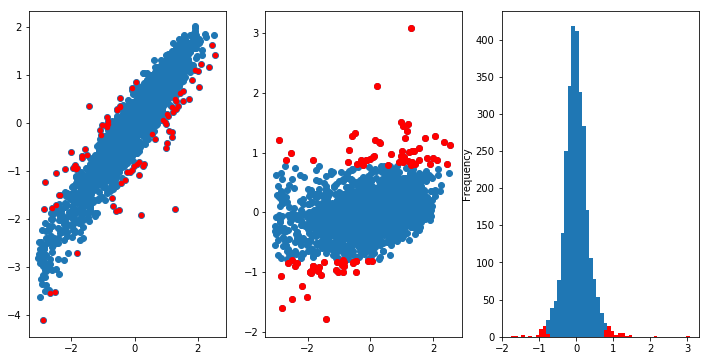

In [77]:
# 画图
plt.figure(figsize=(12,6))
axes = plt.subplot(1,3,1)
axes.scatter(y_train,y_)
axes.scatter(y_train[cond],y_[cond],c = 'red',s = 20)

axes = plt.subplot(1,3,2)
axes.scatter(y_train,y_train - y_)
axes.scatter(y_train[cond],(y_train - y_)[cond],c = 'red')

axes = plt.subplot(1,3,3)
# _ = axes.hist(y_train,bins = 50)
(y_train - y_).plot.hist(bins = 50,ax = axes)
(y_train - y_).loc[cond].plot.hist(bins = 50,ax = axes,color = 'r')

# 将异常值过滤

In [78]:
drop_index = cond[cond].index
print(data_all_std.shape)
data_all_std.drop(drop_index,axis = 0,inplace=True)
data_all_std.shape


(4813, 34)


(4725, 34)

In [79]:
def detect_model(etsimators,data):
    for key,estimator in estimators.items():
        estimator.fit(data[0],data[2])
        y_ = estimator.predict(data[1])
        mse = mean_squared_error(data[3],y_)
        print('-------------------mse%s'%(key),mse)
        r2 = estimator.score(data[1],data[3])
        print('+++++++++++++++++++r2_score%s'%(key),r2)
        print('\n')

In [80]:
cond = data_all_std['origin'] == 'train'
X = data_all_std[cond].iloc[:,:-2]
y = data_all_std[cond]['target']
# data <==>  X_train,X_test,y_train,y_test
data = train_test_split(X,y,test_size = 0.2)

In [86]:
estimators = {}
estimators['knn'] = KNeighborsRegressor()
estimators['linear'] = LinearRegression()
estimators['ridge'] = Ridge()
estimators['lasso'] = Lasso()
estimators['elasticnet'] = ElasticNet()
estimators['forest'] = RandomForestRegressor()
estimators['gbdt'] = GradientBoostingRegressor()
estimators['ada'] = AdaBoostRegressor()
estimators['extreme'] = ExtraTreesRegressor()
estimators['svm_rbf'] = SVR(kernel='rbf')
estimators['svm_poly'] = SVR(kernel='poly')
estimators['light'] = LGBMRegressor()
estimators['xgb'] = XGBRegressor()

In [87]:
# 对于我们的测试数据而言：KNN、Lasso、ElasticNet、SVM_poly
detect_model(estimators,data)

-------------------mseknn 0.16900966250000002
+++++++++++++++++++r2_scoreknn 0.7934740618947866


-------------------mselinear 0.08208283447838186
+++++++++++++++++++r2_scorelinear 0.8996966555507868


-------------------mseridge 0.08219455677718833
+++++++++++++++++++r2_scoreridge 0.8995601334595231


-------------------mselasso 0.8183492229623723
+++++++++++++++++++r2_scorelasso -4.014385723838387e-06


-------------------mseelasticnet 0.47367372116488177
+++++++++++++++++++r2_scoreelasticnet 0.421181557478322


-------------------mseforest 0.0964578355469643
+++++++++++++++++++r2_scoreforest 0.8821307333600812


-------------------msegbdt 0.08566341498741886
+++++++++++++++++++r2_scoregbdt 0.895321268145998


-------------------mseada 0.11165195145299855
+++++++++++++++++++r2_scoreada 0.8635638715916123


-------------------mseextreme 0.09081841068875
+++++++++++++++++++r2_scoreextreme 0.8890219814224016


-------------------msesvm_rbf 0.10869001330210501
+++++++++++++++++++r2_score

In [88]:
estimators = {}
# estimators['linear'] = LinearRegression()
# estimators['ridge'] = Ridge()
# estimators['lasso'] = Lasso()
estimators['forest'] = RandomForestRegressor()
estimators['gbdt'] = GradientBoostingRegressor()
estimators['ada'] = AdaBoostRegressor()
estimators['extreme'] = ExtraTreesRegressor()
estimators['svm_rbf'] = SVR(kernel='rbf')
estimators['light'] = LGBMRegressor()
estimators['xgb'] = XGBRegressor()

In [89]:
cond = data_all_std['origin'] == 'train'

X_train = data_all_std[cond].iloc[:,:-2]
y_train = data_all_std[cond]['target']

cond = data_all_std['origin'] == 'test'
X_test = data_all_std[cond].iloc[:,:-2]

In [90]:
# 一个算法预测结果，将结果合并
y_pred = []
for key,model in estimators.items():
    model.fit(X_train,y_train)
    y_ = model.predict(X_test)
    y_pred.append(y_)

y_ = np.mean(y_pred,axis = 0)

In [91]:
pd.Series(y_).to_csv('./ensemble2.txt',index =False)

In [92]:
# 预测的结果作为新特征，让我们的算法学习，寻找数据和目标值之间的关系
# y_ 预测值，和真实值之间差距，将预测值当成新的特征，让我们算法进行再学习
for key,model in estimators.items():
    model.fit(X_train,y_train)
    y_ = model.predict(X_train)
    X_train[key] = y_
    y_ = model.predict(X_test)
    X_test[key] = y_

In [93]:
# 一个算法预测结果，将结果合并
y_pred = []
for key,model in estimators.items():
    model.fit(X_train,y_train)
    y_ = model.predict(X_test)
    y_pred.append(y_)

y_ = np.mean(y_pred,axis = 0)

In [94]:
pd.Series(y_).to_csv('./ensemble3.txt',index =False)

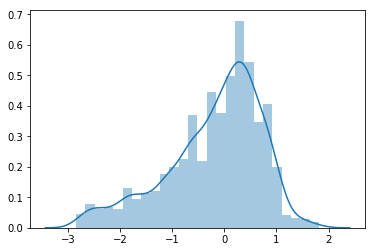

In [95]:
sns.distplot(y_)

# 对数据进行归一化

In [96]:
# 4个测试和训练特征分布不均匀，2个相关性系数小的特征
data_all.head()

,V0,V1,V10,V12,V13,V15,V16,V18,V19,V2,...,V35,V36,V37,V4,V6,V7,V8,V9,origin,target
0,0.566,0.016,-0.940,-0.073,0.550,0.000,-1.707,-0.573,-0.991,-0.143,...,-5.101,-2.608,-3.508,0.452,-1.812,-2.360,-0.436,-2.114,train,0.175
1,0.968,0.437,0.188,-0.134,1.109,0.000,-0.977,-0.571,-0.836,0.066,...,0.364,-0.335,-0.730,0.194,-1.566,-2.360,0.332,-2.114,train,0.676
2,1.013,0.568,0.874,-0.072,0.767,-0.212,-0.618,-0.564,-0.558,0.235,...,0.364,0.765,-0.589,0.112,-1.367,-2.360,0.396,-2.114,train,0.633
3,0.733,0.368,0.011,-0.014,0.769,-0.162,-0.429,-0.574,-0.564,0.283,...,0.364,0.333,-0.112,0.599,-1.200,-2.086,0.403,-2.114,train,0.206
4,0.684,0.638,-0.251,0.199,-0.349,-0.138,-0.391,-0.572,-0.394,0.260,...,0.364,-0.280,-0.028,0.337,-1.073,-2.086,0.314,-2.114,train,0.384


In [97]:
data = data_all.iloc[:,:-2]

#归一化  将属性缩放到一个指定范围
minmaxscaler = MinMaxScaler()

data3 = minmaxscaler.fit_transform(data)
data3

array([[0.77577505, 0.723449  , 0.22174265, ..., 0.43285165, 0.66410771,
        0.73528007],
       [0.83374189, 0.77878549, 0.37388724, ..., 0.43285165, 0.7548128 ,
        0.73528007],
       [0.84023071, 0.79600421, 0.46641489, ..., 0.43285165, 0.76237156,
        0.73528007],
       ...,
       [0.31708724, 0.25289169, 0.0074184 , ..., 0.17367095, 0.10192512,
        0.64706284],
       [0.31045422, 0.24211356, 0.00323712, ..., 0.24075302, 0.1563718 ,
        0.67646858],
       [0.35948089, 0.32216088, 0.35608309, ..., 0.24897256, 0.19971655,
        0.67646858]])

In [98]:
# 归一化的数据
data_all_norm = pd.DataFrame(data3,columns=data_all.columns[:-2])
data_all_norm

,V0,V1,V10,V12,V13,V15,V16,V18,V19,V2,...,V33,V34,V35,V36,V37,V4,V6,V7,V8,V9
0,0.775775,0.723449,0.221743,0.570828,0.694786,0.402245,0.487950,0.375125,0.380238,0.582197,...,0.000000,0.000000,0.242424,0.000000,0.018343,0.571839,0.508616,0.432852,0.664108,0.735280
1,0.833742,0.778785,0.373887,0.564418,0.778544,0.402245,0.569779,0.375374,0.401962,0.611588,...,0.374950,0.499949,0.800020,0.289702,0.436025,0.544381,0.541225,0.432852,0.754813,0.735280
2,0.840231,0.796004,0.466415,0.570933,0.727300,0.372870,0.610021,0.376246,0.440925,0.635354,...,0.374950,0.499949,0.800020,0.429901,0.457224,0.535653,0.567603,0.432852,0.762372,0.735280
3,0.799856,0.769716,0.350013,0.577028,0.727600,0.379798,0.631207,0.375000,0.440084,0.642104,...,0.374950,0.477220,0.800020,0.374841,0.528943,0.587484,0.589740,0.469177,0.763198,0.735280
4,0.792790,0.805205,0.314675,0.599412,0.560084,0.383123,0.635467,0.375249,0.463910,0.638869,...,0.374950,0.462067,0.800020,0.296712,0.541573,0.559600,0.606575,0.469177,0.752687,0.735280
5,0.758327,0.803759,0.279606,0.609395,0.749026,0.417625,0.641968,0.375125,0.446811,0.659682,...,0.374950,0.454490,0.800020,0.308055,0.413021,0.572478,0.615058,0.494366,0.772411,0.735280
6,0.822350,0.776025,0.314001,0.623161,0.707072,0.417625,0.641968,0.373504,0.442887,0.692308,...,0.374950,0.454490,0.800020,0.312643,0.347617,0.547573,0.641172,0.504043,0.801701,0.735280
7,0.836049,0.790878,0.339493,0.607083,0.729248,0.436054,0.686582,0.374377,0.453959,0.701308,...,0.374950,0.454490,0.800020,0.345144,0.410615,0.551192,0.658404,0.517566,0.804535,0.735280
8,0.830858,0.833070,0.376180,0.619168,0.569224,0.442843,0.697904,0.375997,0.494884,0.684433,...,0.374950,0.454490,0.800020,0.339154,0.462637,0.586633,0.670467,0.543683,0.805716,0.735280
9,0.860995,0.860016,0.368087,0.650799,0.591399,0.446169,0.701155,0.375872,0.441065,0.692026,...,0.374950,0.454490,0.800020,0.351644,0.371824,0.681567,0.667683,0.543683,0.829928,0.735280


In [99]:
data_all_norm = pd.merge(data_all_norm,data_all.iloc[:,-2:],left_index= True,right_index=True)

In [100]:
data_all_norm.describe()

,V0,V1,V10,V12,V13,V15,V16,V18,V19,V2,...,V34,V35,V36,V37,V4,V6,V7,V8,V9,target
count,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,...,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,2888.000000
mean,0.694172,0.721357,0.348518,0.578507,0.612372,0.402251,0.679294,0.446542,0.519158,0.602300,...,0.483790,0.762873,0.332385,0.545795,0.523743,0.748823,0.745740,0.715607,0.879536,0.126353
std,0.144198,0.131443,0.134882,0.105088,0.149835,0.138561,0.112095,0.124627,0.140166,0.140628,...,0.101020,0.102037,0.127456,0.150356,0.106430,0.132560,0.132577,0.118105,0.068244,0.983966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.626676,0.679416,0.284327,0.532892,0.519928,0.299016,0.629414,0.399302,0.414436,0.514414,...,0.454490,0.727273,0.270584,0.445647,0.478182,0.683324,0.696938,0.664934,0.852903,-0.350250
50%,0.729488,0.752497,0.366469,0.591635,0.627809,0.391437,0.700258,0.456256,0.540294,0.617072,...,0.499949,0.800020,0.347056,0.539317,0.535866,0.774125,0.771974,0.742884,0.882377,0.313000
75%,0.790195,0.799553,0.432965,0.641971,0.719958,0.489954,0.753279,0.501745,0.623125,0.700464,...,0.511365,0.800020,0.414861,0.643061,0.585036,0.842259,0.836405,0.790835,0.941189,0.793250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


In [101]:
def scale_minmax(data):
    return (data - data.min())/(data.max() - data.min())

NameError: name 'var' is not defined

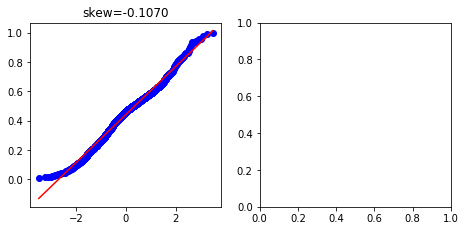

In [106]:
#Check effect of Box-Cox transforms on distributions of continuous variables
# pip install scipy
from scipy import stats
fcols = 6
frows = len(data_all_norm.columns[:10])
plt.figure(figsize=(4*fcols,4*frows))
i=0

for col in data_all_norm.columns[:10]:
    dat = data_all_norm[[col, 'target']].dropna()

#     这条线就是数据分布dist：distribution（分布）
    i+=1
    plt.subplot(frows,fcols,i)
    sns.distplot(dat[col],fit = stats.norm);
    plt.title(var+' Original')
    plt.xlabel('')

#     第二个图：skew统计分析中中一个属性
#     skewness 偏斜系数，对正太分布的度量
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(dat[col], plot=plt)#画图，偏析度
    plt.title('skew='+'{:.4f}'.format(stats.skew(dat[col])))
    plt.xlabel('')
    plt.ylabel('')

#     散点图
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(dat[var], dat['target'],'.',alpha=0.5)
    plt.scatter(dat[col],dat['target'],alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[col], dat['target'])[0][1]))

#     ！！！对数据进行了处理！！！
#   数据分布图distribution
    i+=1
    plt.subplot(frows,fcols,i)
    trans_var, lambda_var = stats.boxcox(dat[col].dropna()+1)
    trans_var = scale_minmax(trans_var)      
    sns.distplot(trans_var , fit=stats.norm);
    plt.title(var+' Tramsformed')
    plt.xlabel('')

#     偏斜度
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(trans_var, plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')

#     散点图
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(trans_var, dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))

In [103]:
# 将数据进行Box-Cox转换
# 统计建模中常用的数据变化
# 数据更加正态化，标准化
for col in data_all_norm.columns[:-2]:
    boxcox,maxlog = stats.boxcox(data_all_norm[col] + 1)
    data_all_norm[col] = scale_minmax(boxcox)

# 过滤异常值

40


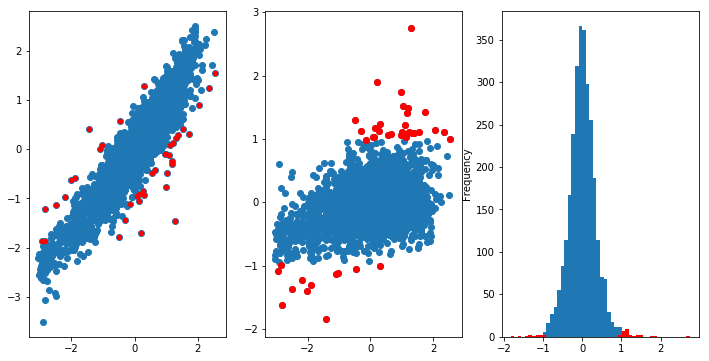

In [107]:
ridge = RidgeCV(alphas=[0.0001,0.001,0.01,0.1,0.2,0.5,1,2,3,4,5,10,20,30,50])

cond = data_all_norm['origin'] == 'train'

X_train = data_all_norm[cond].iloc[:,:-2]
# 真实值
y_train = data_all_norm[cond]['target']
# 算法拟合数据和目标值的时候，不可能100%拟合
ridge.fit(X_train,y_train)
# 预测，预测值肯定会和真实值有一定的偏差，偏差特别大，当成异常值
y_ = ridge.predict(X_train)

cond = abs(y_ - y_train) > y_train.std()
print(cond.sum())
# 画图
plt.figure(figsize=(12,6))
axes = plt.subplot(1,3,1)
axes.scatter(y_train,y_)
axes.scatter(y_train[cond],y_[cond],c = 'red',s = 20)

axes = plt.subplot(1,3,2)
axes.scatter(y_train,y_train - y_)
axes.scatter(y_train[cond],(y_train - y_)[cond],c = 'red')

axes = plt.subplot(1,3,3)
# _ = axes.hist(y_train,bins = 50)
(y_train - y_).plot.hist(bins = 50,ax = axes)
(y_train - y_).loc[cond].plot.hist(bins = 50,ax = axes,color = 'r')

In [108]:
index = cond[cond].index

data_all_norm.drop(index,axis = 0,inplace=True)

In [109]:
cond = data_all_norm['origin'] == 'train'
X_train = data_all_norm[cond].iloc[:,:-2]
y_train = data_all_norm[cond]['target']

cond = data_all_norm['origin'] == 'test'
X_test = data_all_norm[cond].iloc[:,:-2]

In [110]:
estimators = {}
# estimators['linear'] = LinearRegression()
# estimators['ridge'] = Ridge()
# estimators['lasso'] = Lasso()
estimators['forest'] = RandomForestRegressor(n_estimators=300)
estimators['gbdt'] = GradientBoostingRegressor(n_estimators=300)
estimators['ada'] = AdaBoostRegressor(n_estimators=300)
estimators['extreme'] = ExtraTreesRegressor(n_estimators=300)
estimators['svm_rbf'] = SVR(kernel='rbf')
estimators['light'] = LGBMRegressor(n_estimators=300)
estimators['xgb'] = XGBRegressor(n_estimators=300)

In [111]:
result = []
for key,model in estimators.items():
    model.fit(X_train,y_train)
    y_ = model.predict(X_test)
    result.append(y_)
y_ = np.mean(result,axis = 0)

pd.Series(y_).to_csv('./norm.txt',index = False)